<a href="https://colab.research.google.com/github/KellyPared/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import our dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
#Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
#df.head()
copy_df = df.copy()
num_rows = len(df)
num_rows


34299

In [21]:
copy_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [17]:
# drop the index column
copy_df = copy_df.reset_index(drop=True)

In [24]:
copy_df= copy_df.drop(['EIN', 'NAME'], axis=1)

In [25]:
copy_df.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


In [35]:
# convert categorical variables to numerical values
encoder = LabelEncoder()
for col in copy_df.columns:
    if copy_df[col].dtype == 'object':
        copy_df[col] = encoder.fit_transform(copy_df[col].astype(str))

# convert your features to a NumPy array
X = np.array(copy_df.drop(['IS_SUCCESSFUL'], axis=1))

# convert your target variable to a NumPy array
y = np.array(copy_df["IS_SUCCESSFUL"])

# convert X back to a Pandas dataframe
X = pd.DataFrame(X, columns=copy_df.drop(['IS_SUCCESSFUL'], axis=1).columns)


In [36]:

# assuming your preprocessed data is in X and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X.columns)]),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [38]:


# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model on the training set
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
858/858 [==============================] - 5s 4ms/step - loss: 68493.8672 - accuracy: 0.4983 - val_loss: 45119.9961 - val_accuracy: 0.4659
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 63747.1055 - accuracy: 0.4872 - val_loss: 22191.0117 - val_accuracy: 0.4659
Epoch 3/100
858/858 [==============================] - 2s 2ms/step - loss: 42566.3984 - accuracy: 0.4969 - val_loss: 192.1858 - val_accuracy: 0.5341
Epoch 4/100
858/858 [==============================] - 2s 2ms/step - loss: 18671.2930 - accuracy: 0.4881 - val_loss: 4426.9360 - val_accuracy: 0.4659
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 8838.5713 - accuracy: 0.5003 - val_loss: 4004.8201 - val_accuracy: 0.4659
Epoch 6/100
858/858 [==============================] - 2s 3ms/step - loss: 7883.1997 - accuracy: 0.4845 - val_loss: 4311.6558 - val_accuracy: 0.4659
Epoch 7/100
858/858 [==============================] - 3s 3ms/step - loss: 8271.5811 - accuracy: 0.48

In [ ]:
# Preprocess the dataset
#removes the 'EIN' and 'NAME' columns from the dataset named 'df'. 
df = df.drop(['EIN', 'NAME'], axis=1)  

# Converts the values in the 'INCOME_AMT' column of the 'df' dataset from text to numbers
#maps specific text values (0, <1M, 1M-5M, 5M-10M, 10M-50M, and 50M+) to numerical values 
df['INCOME_AMT'] = df['INCOME_AMT'].map({'0': 0, '<1M': 1, '1M-5M': 2, '5M-10M': 3, '10M-50M': 4, '50M+': 5})  # Convert income amount to numerical values


In [ ]:
#split the data into two parts: one part containing all the columns except for the "IS_SUCCESSFUL" column, 
#the other part containing only the "IS_SUCCESSFUL" column

X = df.drop(['IS_SUCCESSFUL'], axis=1)
y = df['IS_SUCCESSFUL']

In [ ]:
# create a new DataFrame called df_encoded by using a function called pd.get_dummies()
# take original DataFrame X and converts each categorical column into a set of new columns, one for each possible value. 
# one-hot encoding

categorical_cols = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'SPECIAL_CONSIDERATIONS']
df_encoded = pd.get_dummies(X, columns=categorical_cols)


In [ ]:
# train_test_split function to split the encoded dataset (df_encoded) and the target variable (y) into two sets: X_train_val and y_train_val, 
#  used for training and validation - testsize 20%
X_train_val, X_test, y_train_val, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

#splits X_train_val and y_train_val into two sets: X_train and y_train, which will be used for training, and X_val and y_val-used for validation
# testsize also 20%
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [ ]:
X_train.select_dtypes(include=['object']).columns


Index([], dtype='object')

The first line creates a dataset for training, and it takes the X_train and y_train data, converts them to floating point values using the numpy library, and then groups them into batches of size 32. Batching the data means that the model will be trained on a small set of data at a time, rather than the entire dataset all at once.

The second line creates a dataset for validation, and it does the same thing as the first line, but it takes the X_val and y_val data instead. This dataset will be used to evaluate the model's performance during training, and to check if it is overfitting.

The third line creates a dataset for testing, and it does the same thing as the first two lines, but it takes the X_test and y_test data instead. This dataset will be used to test the model's performance after it has finished training.

In [ ]:
# Convert the data to TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((X_train.values.astype(np.float32), y_train.values.astype(np.float32))).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_val.values.astype(np.float32), y_val.values.astype(np.float32))).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test.values.astype(np.float32), y_test.values.astype(np.float32))).batch(32)

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[len(X_train.columns)]),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=50)


Epoch 1/50
686/686 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 2/50
686/686 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 3/50
686/686 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 4/50
686/686 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 5/50
686/686 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 6/50
686/686 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 7/50
686/686 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 8/50
686/686 [============================

In [ ]:
#Import and read the charity_data.csv.
rf_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
rf_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
rf_df.describe()


,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [ ]:
# Find the columns with missing values
null_cols = rf_df.columns[rf_df.isnull().sum() > 0]

# Print the columns with missing values
print("Columns with missing values:", null_cols)

Columns with missing values: Index([], dtype='object')


In [ ]:
rf_df = rf_df.reset_index(drop=True)


In [ ]:
# Locate rows with missing values in the INCOME_AMT column
missing_income = df[df['INCOME_AMT'].isnull()]

# Print the rows with missing values in the INCOME_AMT column
# print("Rows with missing values in the INCOME_AMT column:")
# print(missing_income)
# Find rows with NaN values
nan_rows = df[df.isna().any(axis=1)]

# Print the NaN rows
print(len(nan_rows))


0


<ipython-input-27-828351d37143>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = rf_df.corr()


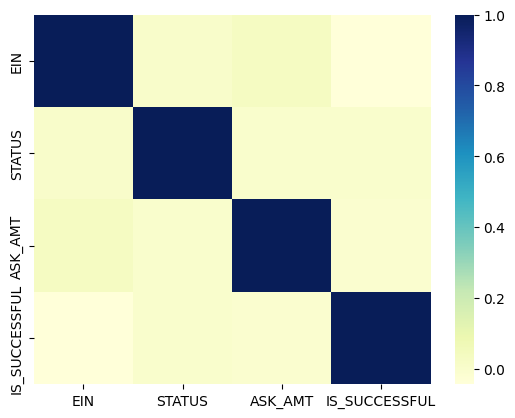

Selected Features:
['IS_SUCCESSFUL']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = rf_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

# Get the absolute correlation values for the target variable
corr_values = corr_matrix["IS_SUCCESSFUL"].abs().sort_values(ascending=False)

# Select the top features with highest correlation
top_features = corr_values[corr_values > 0.1].index.tolist()
df_selected = rf_df[top_features]

# Print the selected features
print("Selected Features:")
print(df_selected.columns.tolist())


In [ ]:
# drop rows that contain NaN values
clean_df = rf_df.dropna()

# select only the columns that you want to use as features
feature_cols = ['INCOME_AMT']
X = clean_df[feature_cols]

# print the shape of the feature matrix
print(X.shape)

(34299, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# transform the validation data using the scaler fitted to the training data
X_val_scaled = scaler.transform(X_val)

#creates a dense (fully connected) layer with 64 neurons/32/1 and a rectified linear unit (ReLU) activation function

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.columns)]),
    layers.Dropout(0.3), #dropout prevents overfitting
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, callbacks=[keras.callbacks.EarlyStopping(patience=10)])



Epoch 1/100
686/686 [==============================] - 3s 3ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 2/100
686/686 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 3/100
686/686 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 4/100
686/686 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 5/100
686/686 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 6/100
686/686 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 7/100
686/686 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.4663 - val_loss: nan - val_accuracy: 0.4749
Epoch 8/100
686/686 [====================